In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from collections import Counter

from urllib.request import urlopen

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import minmax_scale

from sklearn import datasets 
from statsmodels import datasets as smdatasets

plt.rcParams['figure.figsize'] = 8,8

# High Dimensional Data


In [2]:
iris = datasets.load_iris()
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

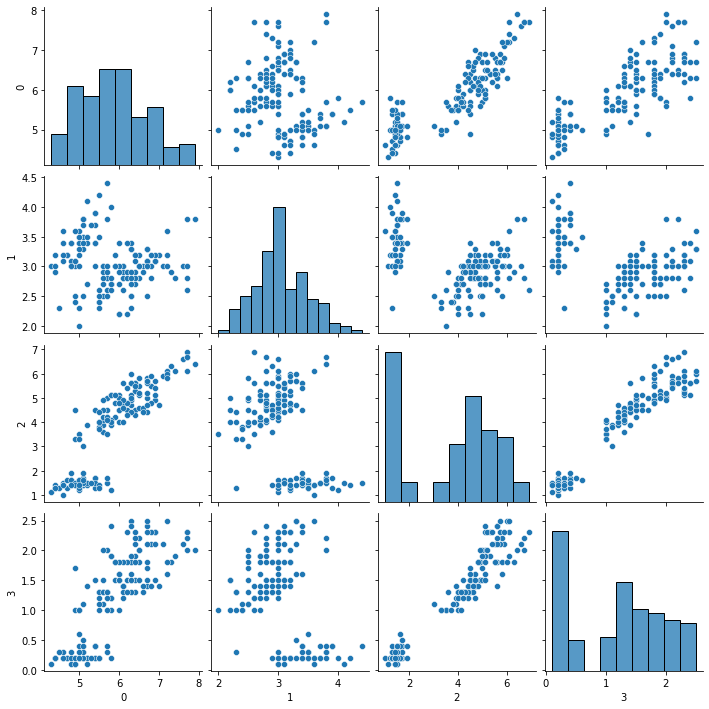

In [118]:
sns.pairplot(pd.DataFrame(iris['data']))

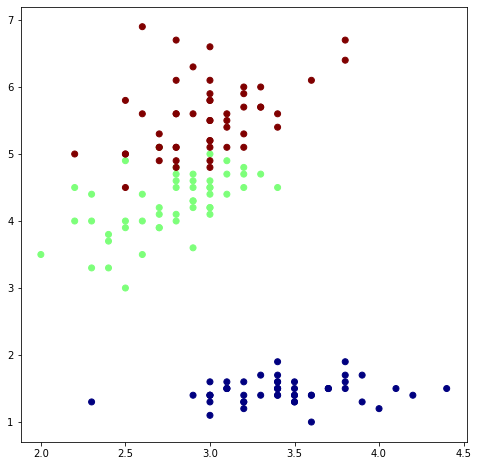

In [119]:
plt.scatter(iris['data'][:,1],iris['data'][:,2],c=iris['target'],cmap='jet')

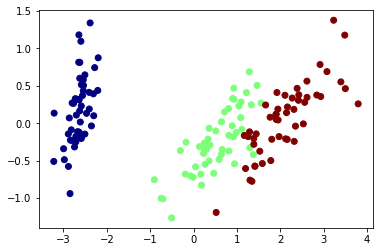

In [5]:
def project(data,target):
    projector = PCA(n_components=2)
    projected = projector.fit_transform(data)
    plt.scatter(projected[:,0],projected[:,1],c=target,cmap='jet')
    
project(iris['data'], iris['target'])

In [6]:
wine = datasets.load_wine()
wine['data'].shape

(178, 13)

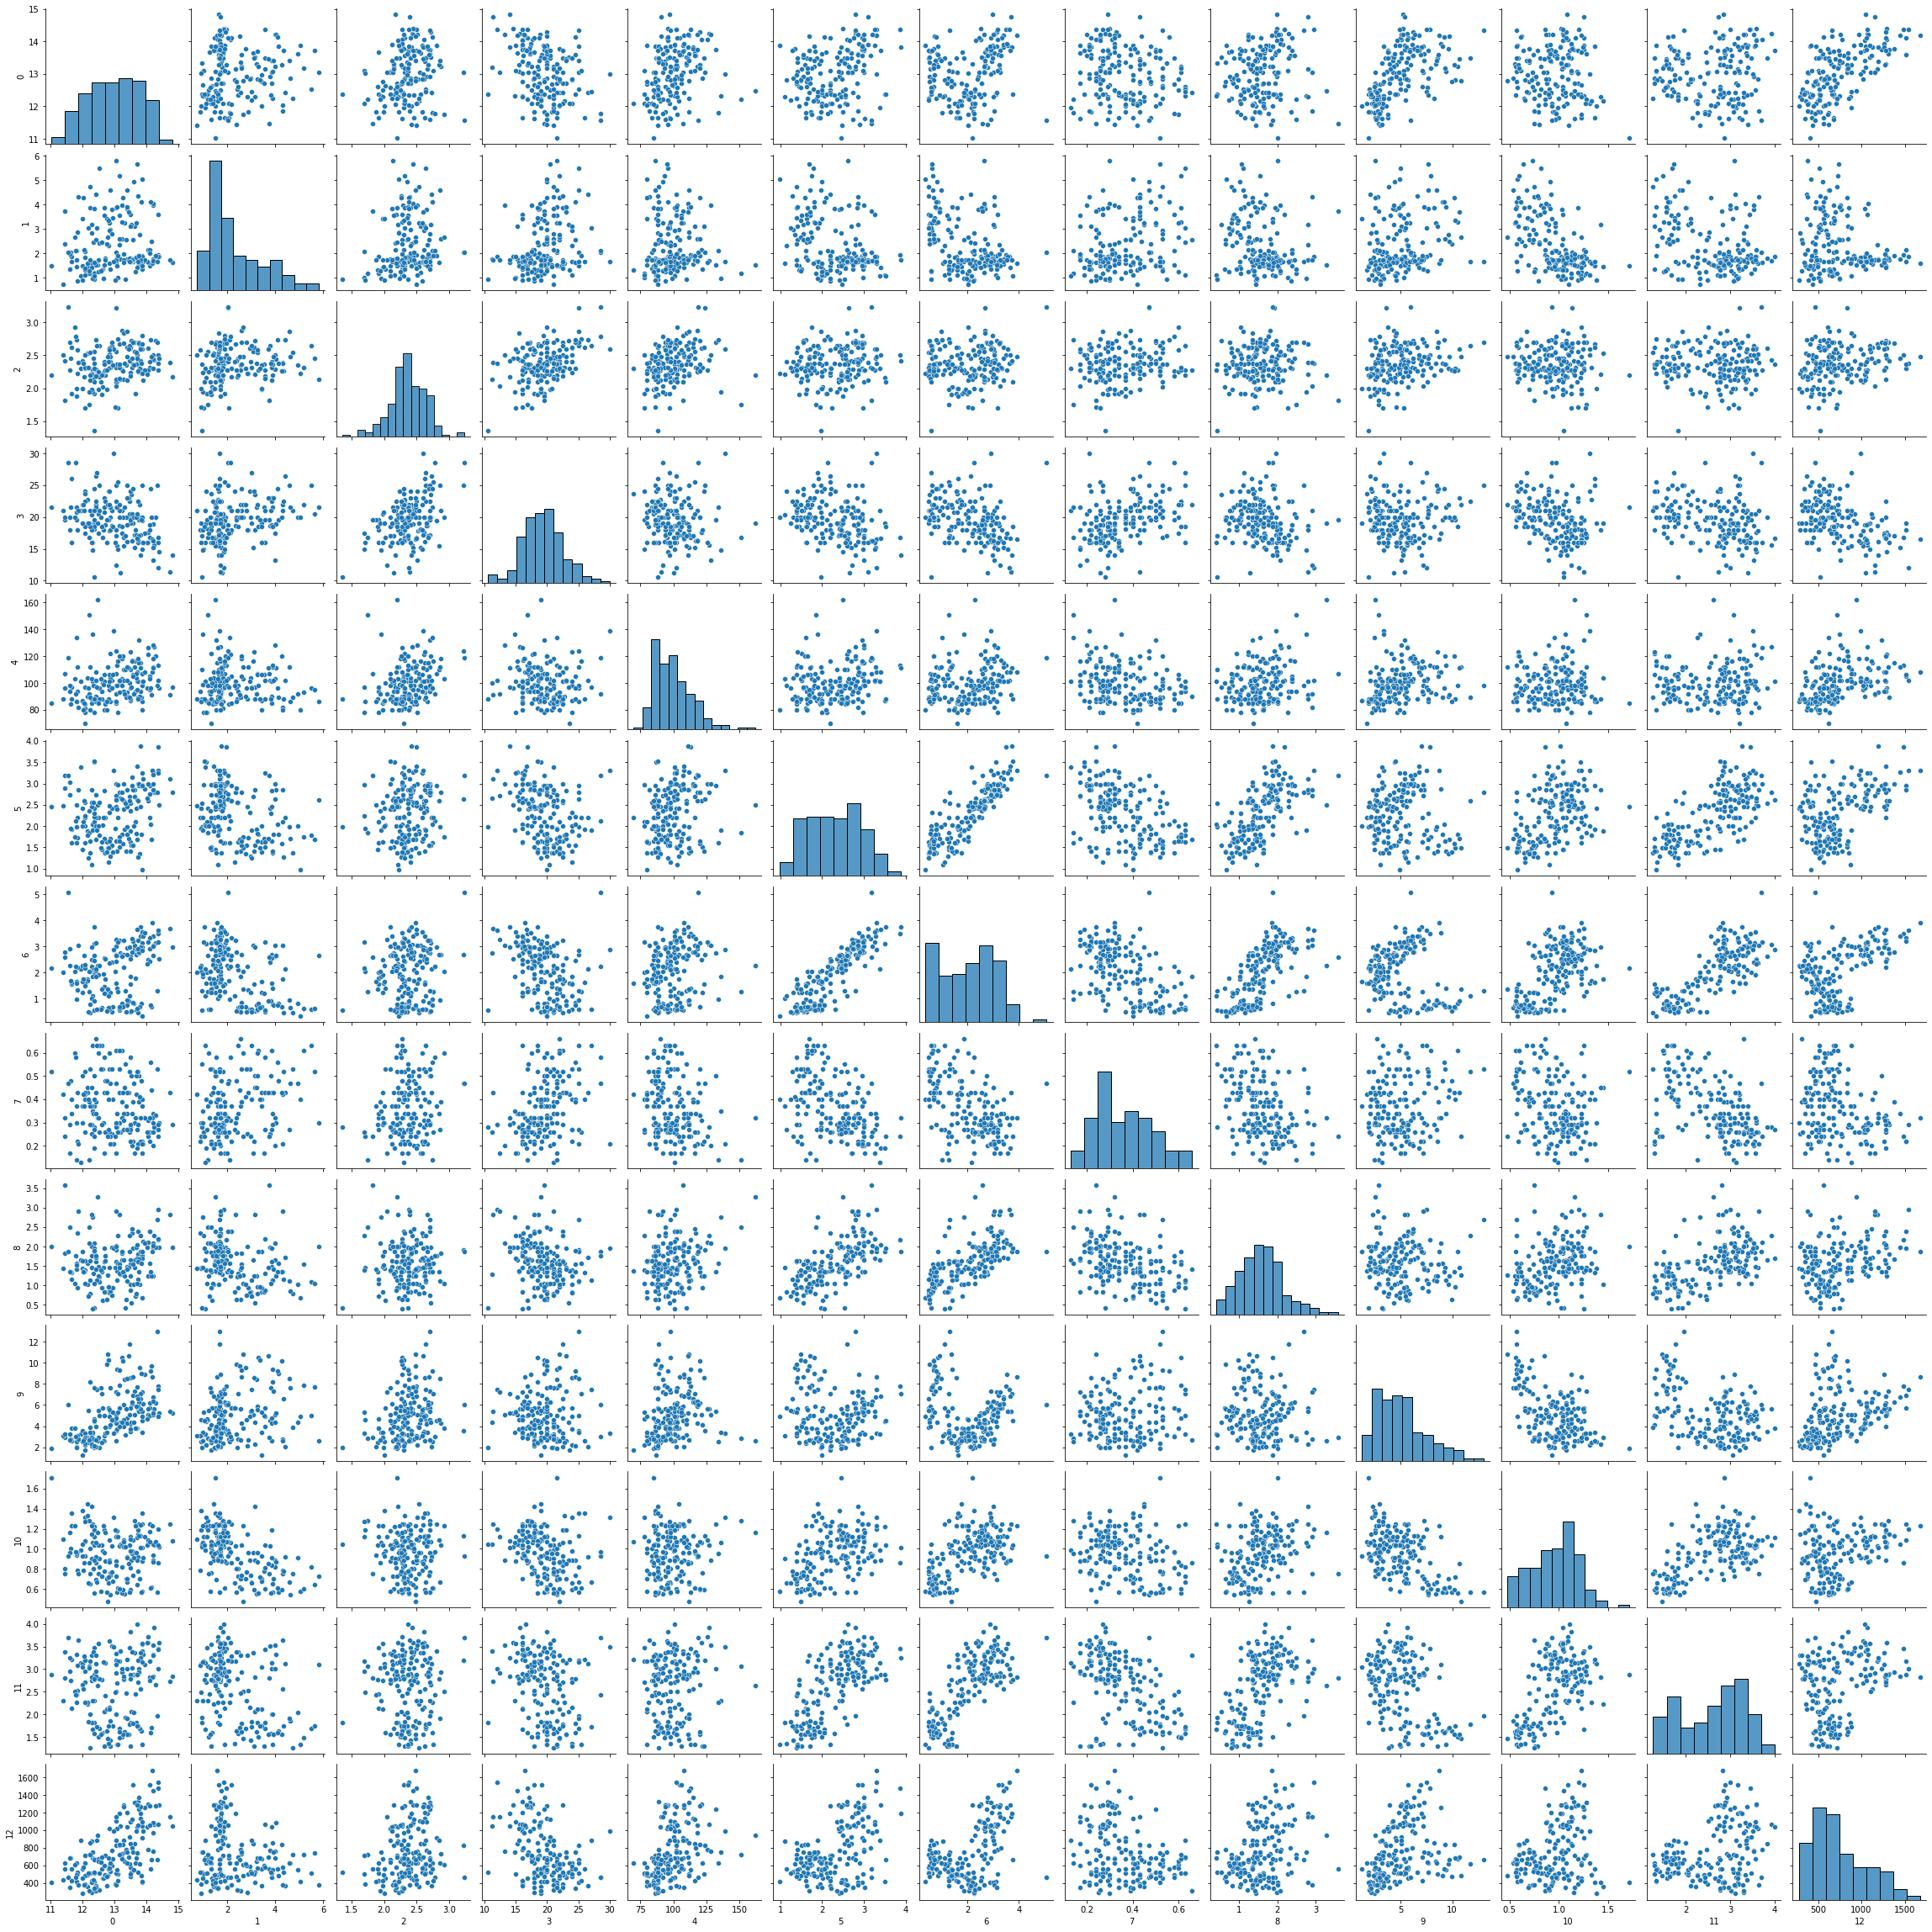

In [7]:
sns.pairplot(pd.DataFrame(wine['data']))

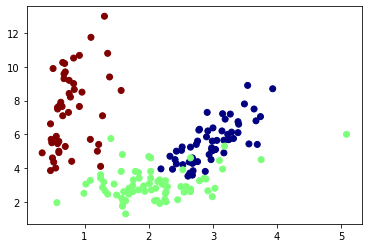

In [8]:
plt.scatter(wine['data'][:,6],wine['data'][:,9],c=wine['target'],cmap='jet')

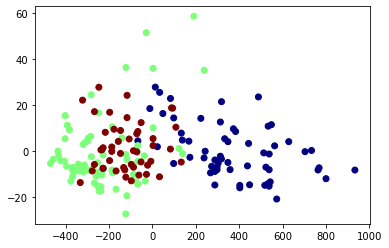

In [9]:
project(wine['data'],wine['target'])

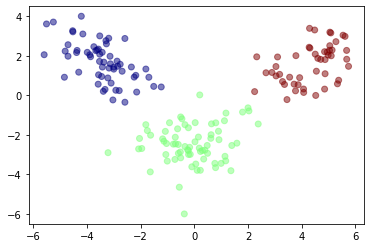

In [10]:
def smartProject(data, target, dim=2, a=0.5):
    smproj = LinearDiscriminantAnalysis(n_components=dim)
    points = smproj.fit_transform(data, target)
    if(dim == 2):
        xs = points[:,0]
        ys = points[:,1]
    else:
        xs = points[:,0]
        ys = np.ones(points.shape[0])
    plt.scatter(xs,ys,c=target,cmap='jet',alpha=a)
    
smartProject(wine['data'],wine['target'])

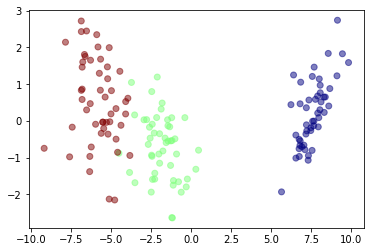

In [11]:
smartProject(iris['data'],iris['target'])

In [12]:
congress = smdatasets.committee.data.load_pandas()
congress.data

,BILLS104,SIZE,SUBS,STAFF,PRESTIGE,BILLS103
0,6.0,58.0,13.0,109.0,1.0,9.0
1,23.0,42.0,0.0,39.0,1.0,101.0
2,44.0,13.0,2.0,25.0,1.0,54.0
3,355.0,39.0,5.0,23.0,1.0,542.0
4,125.0,51.0,5.0,61.0,0.0,101.0
5,131.0,43.0,5.0,69.0,0.0,158.0
6,271.0,49.0,4.0,79.0,0.0,196.0
7,63.0,44.0,3.0,68.0,0.0,40.0
8,149.0,51.0,7.0,99.0,0.0,72.0
9,253.0,35.0,5.0,56.0,0.0,168.0


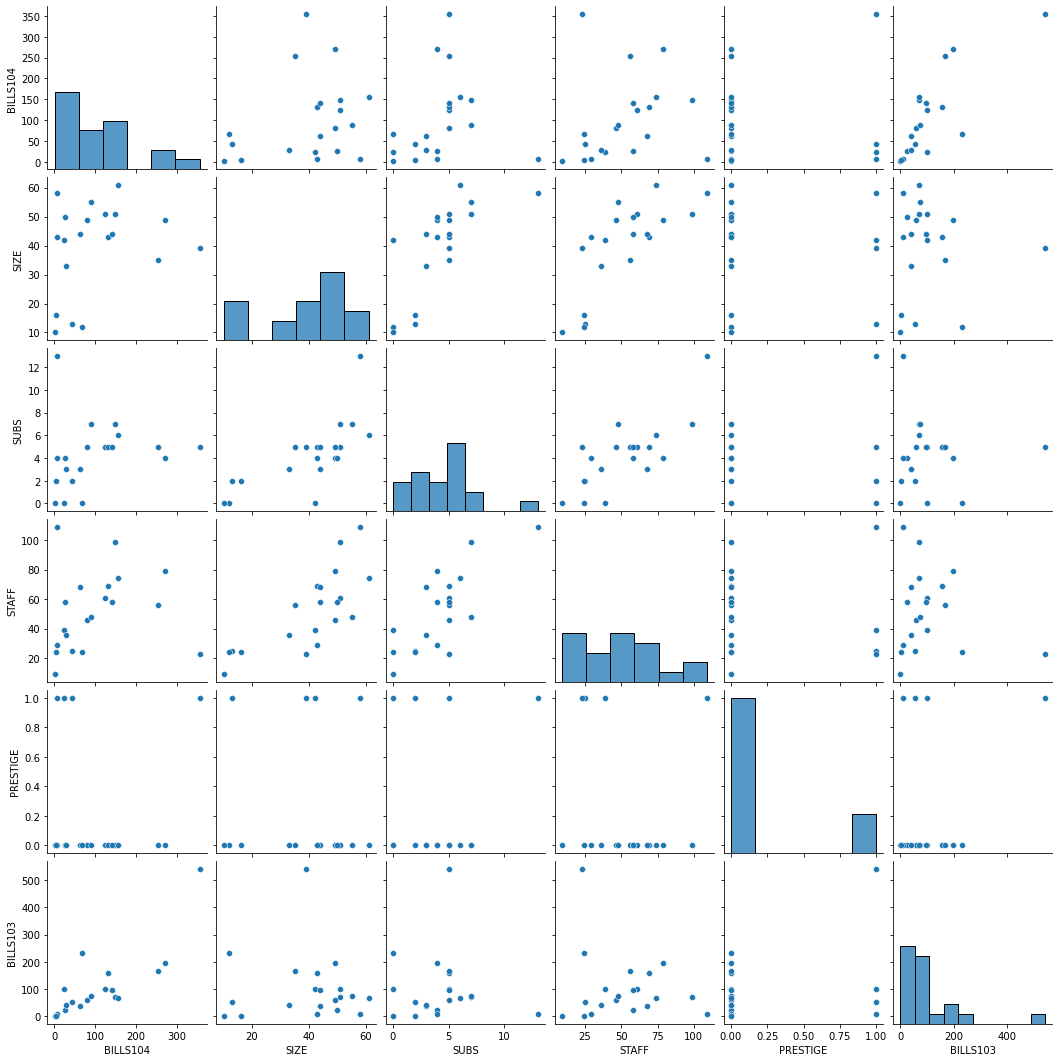

In [13]:
sns.pairplot(congress.data)

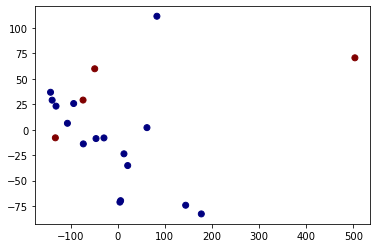

In [14]:
project(congress.data,congress.data['PRESTIGE'])

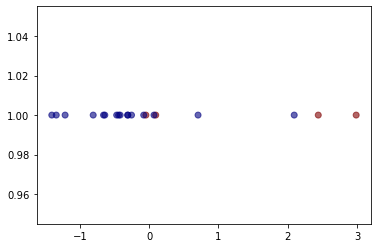

In [15]:
smartProject(congress.data,congress.data['PRESTIGE'],dim=1,a=0.6)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


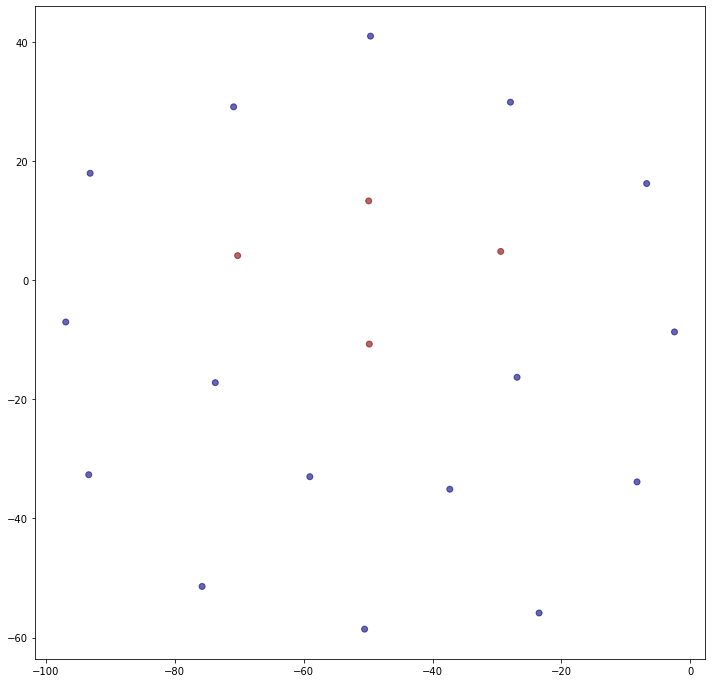

In [116]:
def verySmartProj(data,target, dim=2, a=0.6, how='pca', rate='auto'):
    projector = TSNE(n_components=dim, init=how, learning_rate=rate)
    points = projector.fit_transform(data,target)
    plt.scatter(points[:,0],points[:,1],c=target,alpha=a, cmap='jet')
    
verySmartProj(congress.data,congress.data['PRESTIGE'])

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


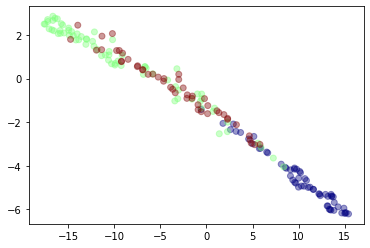

In [17]:
verySmartProj(wine['data'],wine['target'],a=0.4)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


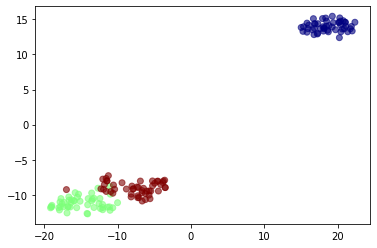

In [18]:
verySmartProj(iris['data'],iris['target'])

In [93]:
datasets.get_data_home(data_home='/home/kaygun/local/data/')
newsgroups = datasets.fetch_20newsgroups_vectorized()

newsgroups['data'].shape

(11314, 130107)

In [95]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [100]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

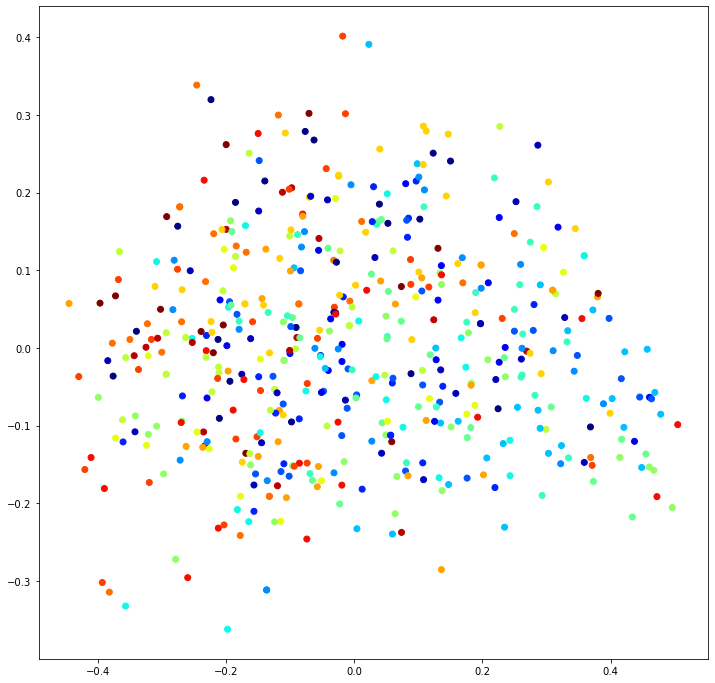

In [115]:
N = newsgroups.target.shape[0]
ns = np.random.randint(0,N,500)
X = newsgroups.data[ns,:]
y = newsgroups.target[ns]

project(X.toarray(),y)

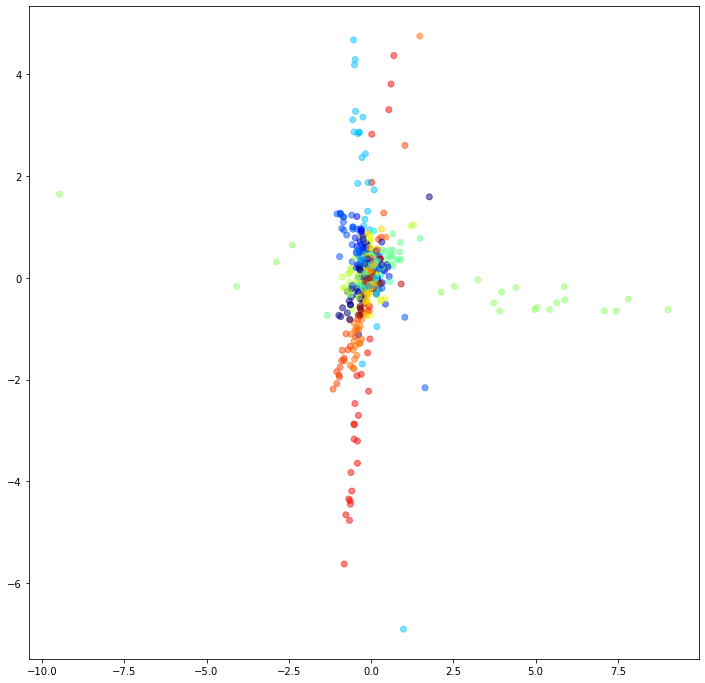

In [114]:
smartProject(X.toarray(),y)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


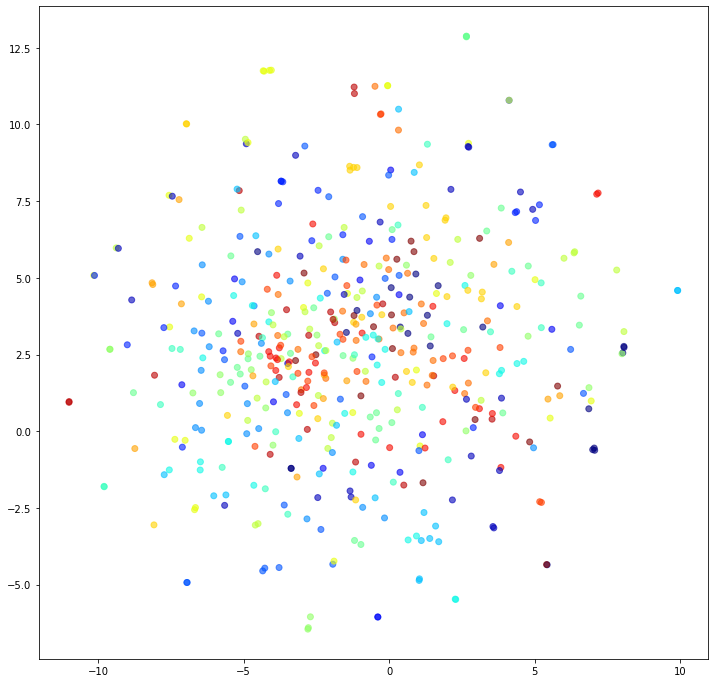

In [113]:
verySmartProj(X.toarray(),y)

In [35]:
pine = loadmat('./data/Indian_pines_corrected.mat')
labels = loadmat('./data/Indian_pines_gt.mat')

In [38]:
pine['indian_pines_corrected'].shape

(145, 145, 200)

In [42]:
labels['indian_pines_gt'].shape

(145, 145)

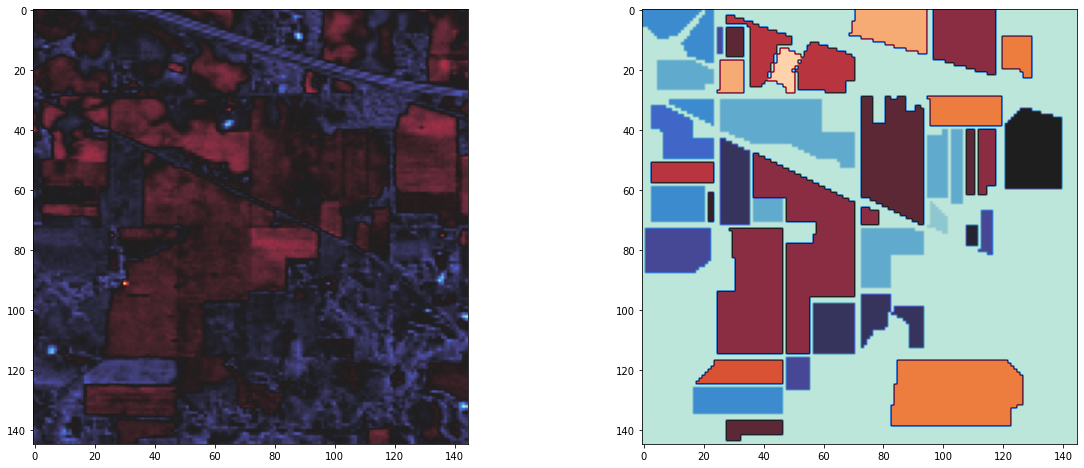

In [85]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(pine['indian_pines_corrected'][:,:,100], cmap='icefire')
ax[1].imshow(labels['indian_pines_gt'], cmap='icefire')

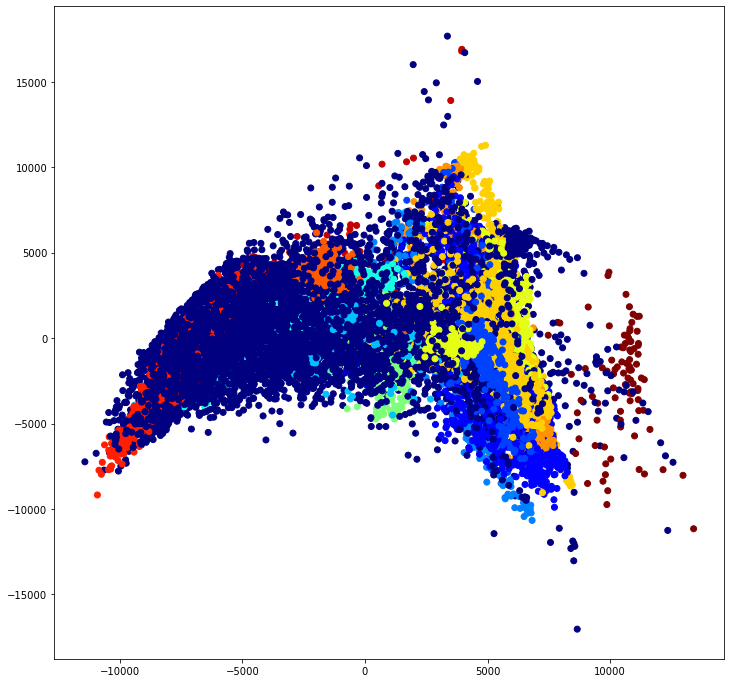

In [71]:
X = pine['indian_pines_corrected'].reshape(145*145,200)
y = labels['indian_pines_gt'].reshape(145*145)
project(X,y)

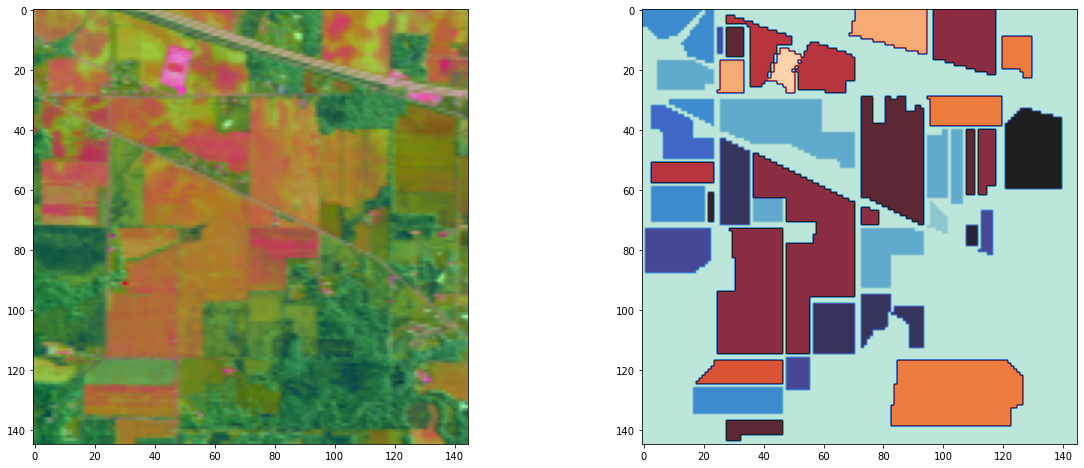

In [86]:
model = PCA(n_components=3)
img = minmax_scale(model.fit_transform(X))
img = img.reshape((145,145,3))

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(img, cmap='icefire')
ax[1].imshow(labels['indian_pines_gt'], cmap='icefire')

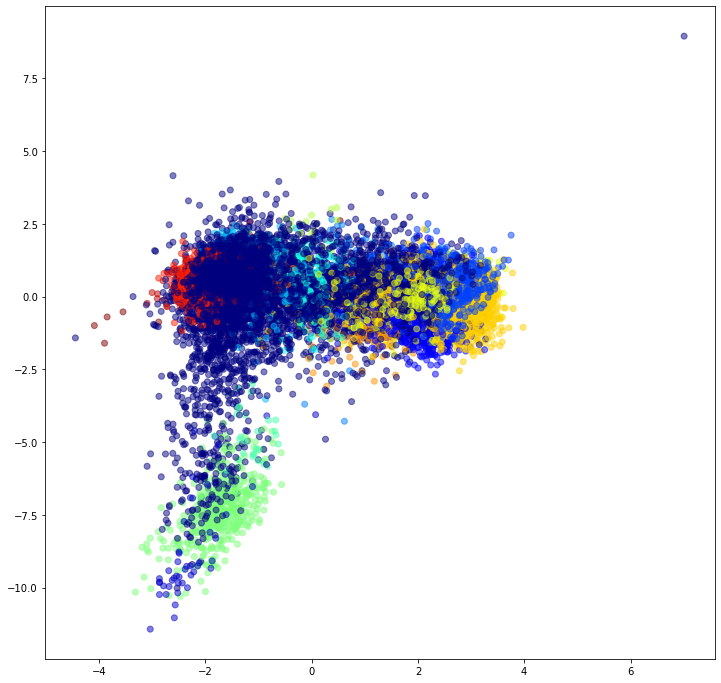

In [89]:
smartProject(X,y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


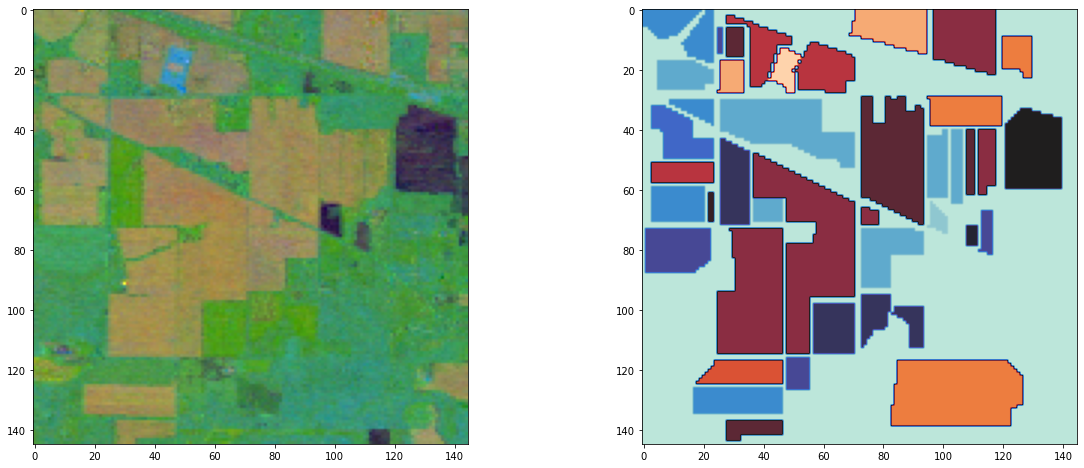

In [91]:
model = LinearDiscriminantAnalysis(n_components=3)
img = minmax_scale(model.fit_transform(X,y))
img = img.reshape((145,145,3))

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(img, cmap='icefire')
ax[1].imshow(labels['indian_pines_gt'], cmap='icefire')

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2e7

In [ ]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as url:
    raw = url.read().decode('utf-8')
raw

In [ ]:
document = nlp(raw)
sentences = list(document.sents)
sentences

In [ ]:
cl = re.sub

data = [re.sub('[^A-Za-z ]','',x.text.lower()) for x in sentences]
data

In [ ]:
vectorizer = TfidfVectorizer()
vs = vectorizer.fit_transform(data)
vs.shape

In [ ]:
compressor = PCA(n_components=100)
points = compressor.fit_transform(vs.toarray())

In [ ]:
plt.scatter(points[:,0],points[:,1],alpha=0.2)

In [ ]:
xs = vs.toarray()
res = np.matmul(xs,xs.transpose())
res.shape

In [ ]:
plt.imshow(res,cmap='gray')

In [ ]:
img = (res*255).astype(int)
img

In [ ]:
plt.imshow(img[:100,:100])